In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import math

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [ ]:
display(df.dtypes)

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
df.shape

(4600, 18)

In [ ]:
df['country']

0       USA
1       USA
2       USA
3       USA
4       USA
       ... 
4595    USA
4596    USA
4597    USA
4598    USA
4599    USA
Name: country, Length: 4600, dtype: object

# الف

(array([2.773e+03, 1.534e+03, 1.940e+02, 5.900e+01, 2.500e+01, 7.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([       0.,   531800.,  1063600.,  1595400.,  2127200.,  2659000.,
         3190800.,  3722600.,  4254400.,  4786200.,  5318000.,  5849800.,
         6381600.,  6913400.,  7445200.,  7977000.,  8508800.,  9040600.,
         9572400., 10104200., 10636000., 11167800., 11699600., 12231400.,
        12763200., 13295000., 13826800., 14358600., 14890400., 15422200.,
      

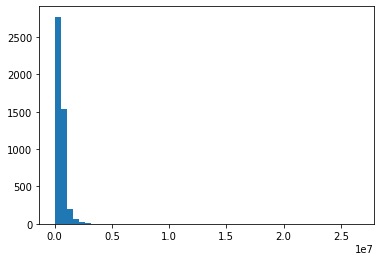

In [ ]:
plt.hist(df.price,bins = 50)

In [ ]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed\n")
    return data

In [ ]:
df = remove_outliers(df, 'price')

Outliers of price are removed



In [ ]:
df.drop('date', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical_columns = ['street','city','statezip','country']
for i in categorical_columns :
  labelencoder = LabelEncoder()
  df[i] = labelencoder.fit_transform(df[i])

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1435,36,62,0
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2164,18,26,0
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3998,3,7,0
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4083,31,31,0
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,3305,35,54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3237,35,62,0
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,904,3,6,0
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,3783,32,37,0
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3283,35,71,0


In [ ]:
x = df.drop('price',axis =1).values
y = df['price'].values
x = x.astype(np.float32)
y = y.astype(np.float32)

In [ ]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
x_scaled = s_scaler.fit_transform(x)

# ب

In [ ]:
#splitting Train and Test and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1) 

In [ ]:
class MLP(nn.Module):

    def __init__(self, input_size = 16):
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(input_size,4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 4)
        self.fc4 = nn.Linear(4, 4)
        self.fc5 = nn.Linear(4, 1)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = F.relu(self.fc4(X))
        X = F.relu(self.fc5(X))


        return X

In [ ]:
model = MLP()

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [ ]:
def train(x_train,y_train,X_val,y_val,model,epochs): 
  loss_list = []
  mse_list_train = []
  mae_list_train = []
  mse_list_val = []
  mae_list_val = []

  for epoch in range(epochs):
    
    inputs = x_train
    target = y_train


    # forward
    out = model(inputs)
    #print("out",out, "  ", "target", target)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # mse and mae for train
    y_pre_train = model(x_train)
    MAE_train = np.mean(np.abs(y_train.detach().numpy() - y_pre_train.detach().numpy()))
    mae_list_train.append(MAE_train)
    MSE_train = np.mean(np.square(y_train.detach().numpy() - y_pre_train.detach().numpy()))
    mse_list_train.append(MSE_train)
    
    # mse and mae for validation
    y_pre_val = model(X_val)
    MAE_val = np.mean(np.abs(y_val.detach().numpy() - y_pre_val.detach().numpy()))
    mae_list_val.append(MAE_val)
    MSE_val = np.mean(np.square(y_val.detach().numpy() - y_pre_val.detach().numpy()))
    mse_list_val.append(MSE_val)
    loss_list.append(loss.item())
    print("Epoch : {} , loss : {} ".format(epoch,loss))
  return loss_list,mae_list_train,mse_list_train,mae_list_val,mse_list_val

In [ ]:
tensor_X_train = torch.from_numpy(X_train)
tensor_y_train = torch.from_numpy(y_train)
tensor_X_val = torch.from_numpy(X_val)
tensor_y_val = torch.from_numpy(y_val)

In [ ]:
loss_list,mae_list_train,mse_list_train,mae_list_val,mse_list_val = train(tensor_X_train,tensor_y_train,tensor_X_val,tensor_y_val,model,1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([2930])) that is different to the input size (torch.Size([2930, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch : 0 , loss : 292582031360.0 
Epoch : 1 , loss : 292581900288.0 
Epoch : 2 , loss : 292581736448.0 
Epoch : 3 , loss : 292581507072.0 
Epoch : 4 , loss : 292581081088.0 
Epoch : 5 , loss : 292580491264.0 
Epoch : 6 , loss : 292579475456.0 
Epoch : 7 , loss : 292577869824.0 
Epoch : 8 , loss : 292575248384.0 
Epoch : 9 , loss : 292571152384.0 
Epoch : 10 , loss : 292564762624.0 
Epoch : 11 , loss : 292554899456.0 
Epoch : 12 , loss : 292540022784.0 
Epoch : 13 , loss : 292518068224.0 
Epoch : 14 , loss : 292486316032.0 
Epoch : 15 , loss : 292441030656.0 
Epoch : 16 , loss : 292377657344.0 
Epoch : 17 , loss : 292290330624.0 
Epoch : 18 , loss : 292171612160.0 
Epoch : 19 , loss : 292012294144.0 
Epoch : 20 , loss : 291801169920.0 
Epoch : 21 , loss : 291524280320.0 
Epoch : 22 , loss : 291164848128.0 
Epoch : 23 , loss : 290702819328.0 
Epoch : 24 , loss : 290114174976.0 
Epoch : 25 , loss : 289370505216.0 
Epoch : 26 , loss : 288438550528.0 
Epoch : 27 , loss : 287279546368.0 
Ep

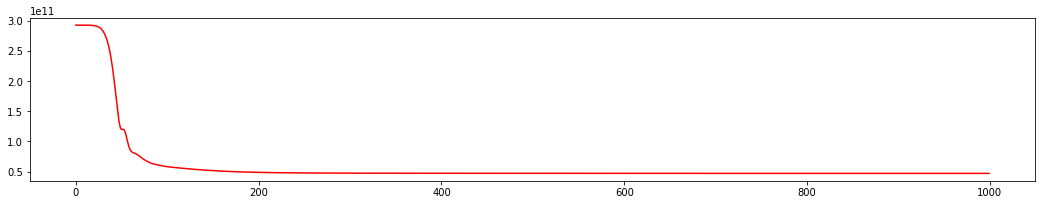

In [ ]:
plt.figure(figsize=(18,3)) 
plt.plot(loss_list, c='red')
plt.show()

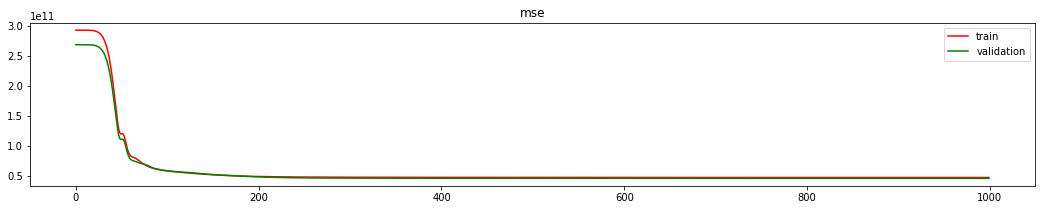

In [ ]:
plt.figure(figsize=(18,3)) 
plt.plot(mse_list_train, c='red',label = 'train')
plt.plot(mse_list_val, c='green',label = 'validation')
plt.title("mse")
plt.legend()
plt.show()

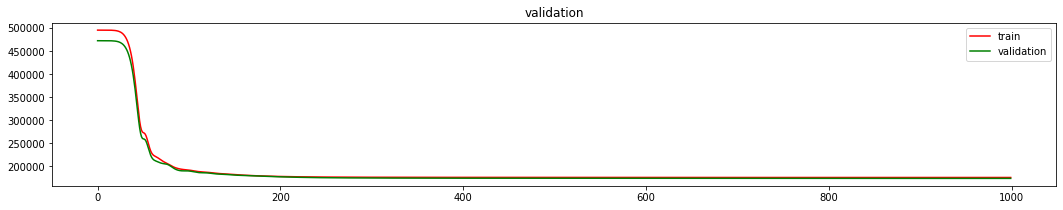

In [ ]:
plt.figure(figsize=(18,3)) 
plt.plot(mae_list_train, c='red',label = 'train')
plt.plot(mae_list_val, c='green',label = 'validation')
plt.title("validation")
plt.legend()
plt.show()

# ج

In [ ]:
def train(x_train,y_train,X_val,y_val,model,epochs): 
  loss_list = []
  mse_list_train = []
  mae_list_train = []
  mse_list_val = []
  mae_list_val = []

  for epoch in range(epochs):
    
    inputs = x_train
    target = y_train


    # forward
    out = model(inputs)
    #print("out",out, "  ", "target", target)
    #print(out.squeeze(1))
    #print(target)
    loss = criterion(out.squeeze(1), target)
    #print(loss)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # mse and mae for train
    y_pre_train = model(x_train)
    MAE_train = np.mean(np.abs(y_train.detach().numpy() - y_pre_train.detach().numpy()))
    mae_list_train.append(MAE_train)
    MSE_train = np.mean(np.square(y_train.detach().numpy() - y_pre_train.detach().numpy()))
    mse_list_train.append(MSE_train)
    
    # mse and mae for validation
    y_pre_val = model(X_val)
    MAE_val = np.mean(np.abs(y_val.detach().numpy() - y_pre_val.detach().numpy()))
    mae_list_val.append(MAE_val)
    MSE_val = np.mean(np.square(y_val.detach().numpy() - y_pre_val.detach().numpy()))
    mse_list_val.append(MSE_val)
    loss_list.append(loss.item())
    print("Epoch : {} , loss : {} ".format(epoch,loss))
  return loss_list,mae_list_train,mse_list_train,mae_list_val,mse_list_val

In [ ]:
model = MLP()
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.09)

In [ ]:
loss_list,mae_list_train,mse_list_train,mae_list_val,mse_list_val = train(tensor_X_train,tensor_y_train,tensor_X_val,tensor_y_val,model,1000)

Epoch : 0 , loss : 495344.65625 
Epoch : 1 , loss : 495344.0 
Epoch : 2 , loss : 495343.28125 
Epoch : 3 , loss : 495342.09375 
Epoch : 4 , loss : 495340.34375 
Epoch : 5 , loss : 495337.75 
Epoch : 6 , loss : 495333.75 
Epoch : 7 , loss : 495327.96875 
Epoch : 8 , loss : 495319.53125 
Epoch : 9 , loss : 495307.34375 
Epoch : 10 , loss : 495290.3125 
Epoch : 11 , loss : 495266.5625 
Epoch : 12 , loss : 495233.84375 
Epoch : 13 , loss : 495189.375 
Epoch : 14 , loss : 495129.46875 
Epoch : 15 , loss : 495049.84375 
Epoch : 16 , loss : 494944.96875 
Epoch : 17 , loss : 494808.0625 
Epoch : 18 , loss : 494630.96875 
Epoch : 19 , loss : 494403.625 
Epoch : 20 , loss : 494113.40625 
Epoch : 21 , loss : 493743.96875 
Epoch : 22 , loss : 493269.09375 
Epoch : 23 , loss : 492648.53125 
Epoch : 24 , loss : 491850.3125 
Epoch : 25 , loss : 490841.28125 
Epoch : 26 , loss : 489577.09375 
Epoch : 27 , loss : 488004.53125 
Epoch : 28 , loss : 486061.53125 
Epoch : 29 , loss : 483675.40625 
Epoch : 

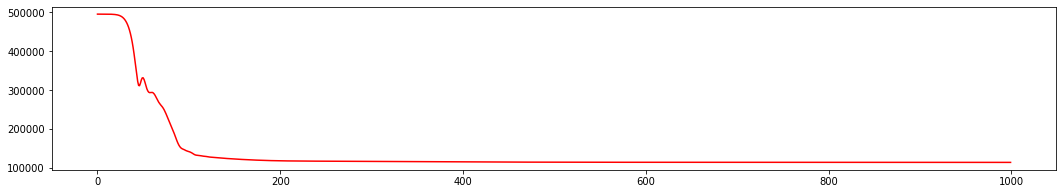

In [ ]:
plt.figure(figsize=(18,3)) 
plt.plot(loss_list, c='red')
plt.show()

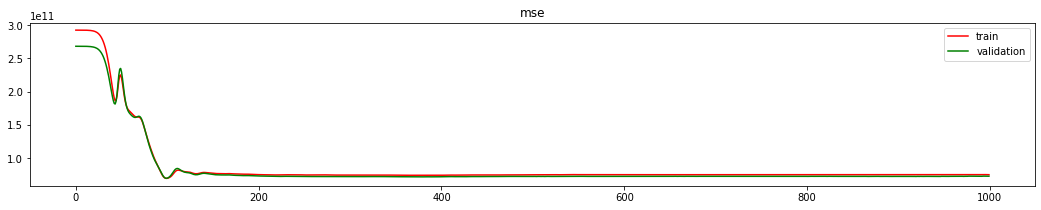

In [ ]:
plt.figure(figsize=(18,3)) 
plt.plot(mse_list_train, c='red',label = 'train')
plt.plot(mse_list_val, c='green',label = 'validation')
plt.title("mse")
plt.legend()
plt.show()

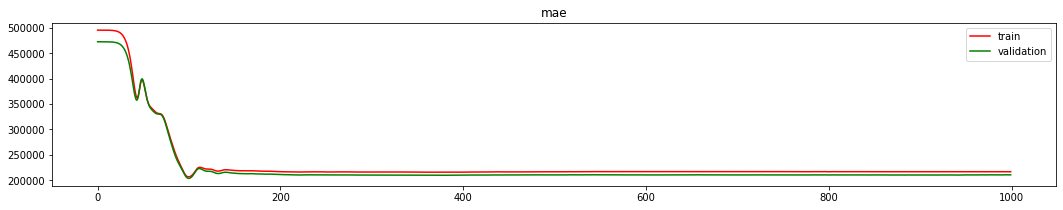

In [ ]:
plt.figure(figsize=(18,3)) 
plt.plot(mae_list_train, c='red',label = 'train')
plt.plot(mae_list_val, c='green',label = 'validation')
plt.title("mae")
plt.legend()
plt.show()

#امتیازی


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# training model with 0.5 alpha value
model = Ridge(alpha = 0.5, normalize = False, tol = 0.001, \
              solver ='auto', random_state = 42)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


Ridge(alpha=0.5, normalize=False, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# finding score for our model
score = model.score(X_test, y_test)
print("\n\nModel score : ", score)



Model score :  0.49008148799012363


In [ ]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error
mean_squared_error(y_test, y_pred)

22541892000.0

In [ ]:
mean_absolute_error(y_test, y_pred)

118695.805